In [3]:
import pandas as pd

file_path = r"D:\WORK\4_STUDENT_DTU\OneDrive - Danmarks Tekniske Universitet\12_Semesters\5_13week_courses\46765_MachineLearning_EnergySystems\0.MachineLearning_EenrgySystems_Assignments\RawData_20200101-20241231\Spot_Price_Regions_Hourly.csv"

df_prices = pd.read_csv(file_path, nrows=5)  # just load first few rows
print(df_prices.columns.tolist())

['ts', 'HourUTC | HourUTC | 1205556', 'HourDK | HourDK | 1205557', 'PriceArea | PriceArea | 1205558', 'SpotPriceDKK | SpotPriceDKK | 1205559']


In [1]:
import pandas as pd
import os

# --- Paths ---
file_path = r"D:\WORK\4_STUDENT_DTU\OneDrive - Danmarks Tekniske Universitet\12_Semesters\5_13week_courses\46765_MachineLearning_EnergySystems\0.MachineLearning_EenrgySystems_Assignments\RawData_20200101-20241231\Spot_Price_Regions_Hourly.csv"
out_dir = r"D:\WORK\4_STUDENT_DTU\OneDrive - Danmarks Tekniske Universitet\12_Semesters\5_13week_courses\46765_MachineLearning_EnergySystems\0.MachineLearning_EenrgySystems_Assignments\ProcessedData"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "Spot_Prices_Hourly_DK2_SYSTEM.csv")

# --- Load dataset ---
df_prices = pd.read_csv(file_path)

# --- Rename messy headers ---
df_prices = df_prices.rename(columns={
    "PriceArea | PriceArea | 1205558": "PriceArea",
    "SpotPriceDKK | SpotPriceDKK | 1205559": "SpotPriceDKK"
})

# --- Keep only useful columns ---
df_prices = df_prices[["ts", "PriceArea", "SpotPriceDKK"]]

# --- Parse timestamp ---
df_prices["ts"] = pd.to_datetime(df_prices["ts"], errors="coerce")

# --- Pivot: one row per ts, PriceAreas as columns ---
df_wide = df_prices.pivot(
    index="ts",
    columns="PriceArea",
    values="SpotPriceDKK"
)

# --- Keep only DK2 + SYSTEM ---
df_wide = df_wide[["DK2", "SYSTEM"]]

# --- Rename for clarity ---
df_wide = df_wide.rename(columns={"DK2": "DK2_DKK", "SYSTEM": "SYSTEM_DKK"})

# Collapse to hourly resolution, keeping the actual values (drop NaN rows)
df_wide = df_wide.groupby(df_wide.index.floor("h")).max()

# --- Save ---
df_wide.to_csv(out_path)

print("Final shape (hourly DK2 + SYSTEM):", df_wide.shape)
print(df_wide.head(10))


Final shape (hourly DK2 + SYSTEM): (43847, 2)
PriceArea               DK2_DKK  SYSTEM_DKK
ts                                         
2020-01-01 00:00:00  237.330002  228.809998
2020-01-01 01:00:00  235.830002  226.940002
2020-01-01 02:00:00  233.660004  224.399994
2020-01-01 03:00:00  230.449997  220.820007
2020-01-01 04:00:00  225.149994  209.910004
2020-01-01 05:00:00  225.369995  205.949997
2020-01-01 06:00:00  224.100006  204.309998
2020-01-01 07:00:00  228.809998  209.089996
2020-01-01 08:00:00  228.509995  211.850006
2020-01-01 09:00:00  226.119995  212.520004


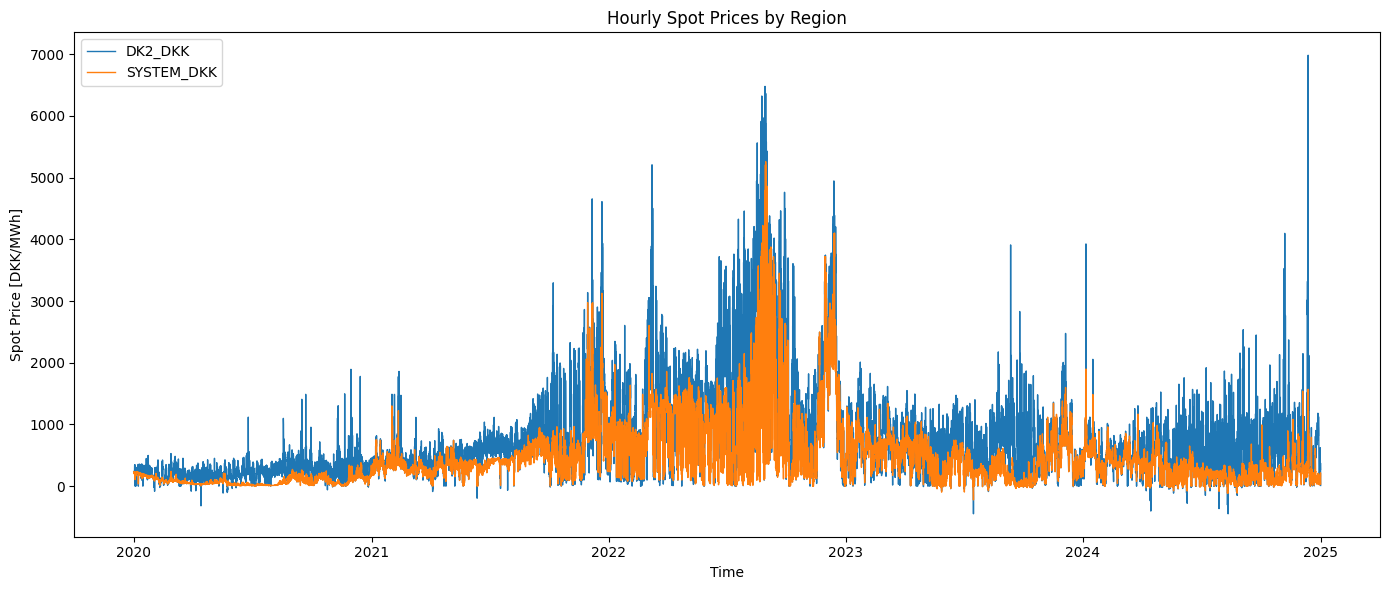

In [3]:
import matplotlib.pyplot as plt

# Pick a subset of regions to keep the plot readable
regions = ["DK2_DKK", "SYSTEM_DKK"]

plt.figure(figsize=(14,6))

for r in regions:
    plt.plot(df_wide.index, df_wide[r], label=r, linewidth=1)

plt.title("Hourly Spot Prices by Region")
plt.xlabel("Time")
plt.ylabel("Spot Price [DKK/MWh]")
plt.legend()
plt.tight_layout()
plt.show()

